# Introduction to Regression with Neural Networks in Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating some data to view and fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

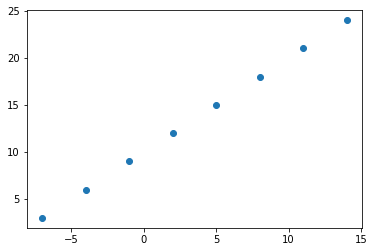

In [4]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Vizualize it
plt.scatter(X, Y)

In [6]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [8]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
input_shape = X.shape
output_shape = Y.shape

input_shape, output_shape

((8,), (8,))

In [46]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [47]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

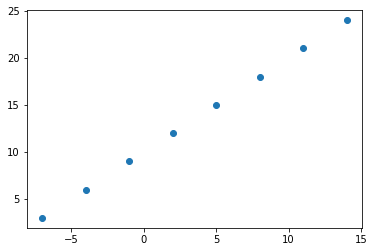

In [48]:
plt.scatter(X, Y)

## Steps in modeling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compling a model** - define the loss function (in other words, the function which tells our model how wring it is) and the optimizer() and evalution metrics.
3. **Fitting a model** - letting the model try to find patterns between X and Y.

In [49]:
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [50]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 263ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [51]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [52]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [53]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improve the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layers.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data.

In [54]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                                                            
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(X, Y, epochs=100)              

Epoch 1/100
1/1 [==============================] - 0s 257ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 10

In [55]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [56]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [57]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)                                                          
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

# Fit the model
model.fit(X, Y, epochs=100)              

Epoch 1/100
1/1 [==============================] - 0s 396ms/step - loss: 13.0789 - mae: 13.0789
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5932 - mae: 12.5932
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1045 - mae: 12.1045
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.6119 - mae: 11.6119
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1142 - mae: 11.1142
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6099 - mae: 10.6099
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0980 - mae: 10.0980
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.5771 - mae: 9.5771
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0459 - mae: 9.0459
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5033 - mae: 8.5033
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

In [58]:
model.predict([17.0])

array([[29.207243]], dtype=float32)

In [59]:
# Let's see if we can make another to improve our model

model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(50, activation='relu'),
     tf.keras.layers.Dense(1)
    ]
)

model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['mae'])

model.fit(X, Y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 12.4190 - mae: 12.4190
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.8429 - mae: 11.8429
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2582 - mae: 11.2582
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6721 - mae: 10.6721
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0804 - mae: 10.0804
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5489 - mae: 9.5489
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1225 - mae: 9.1225
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6845 - mae: 8.6845
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2325 - mae: 8.2325
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.7671 - mae: 7.7671
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - 

In [60]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [61]:
model.predict([17.0])

array([[28.953915]], dtype=float32)